<a href="https://colab.research.google.com/github/imaansh/Stock-Prediction-LSTM/blob/main/Apple_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as web
import pandas as pd
import datetime as dt
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [ ]:
import yfinance as yf

In [ ]:
e  = ['AAPL','AMZN']
Apple_data =yf.download(tickers= e[0],period='5y')
Amazon_data = yf.download(tickers=e[1],period = '5y')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

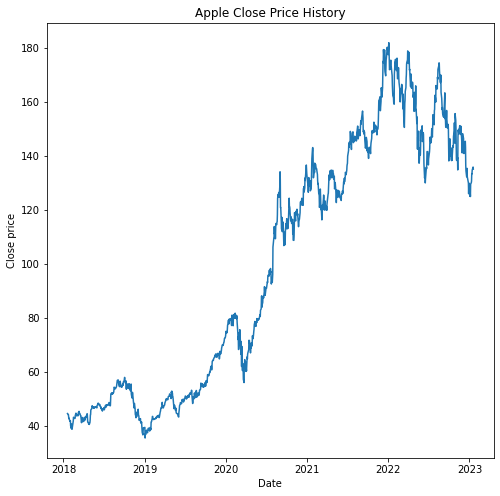

In [ ]:
plt.figure(1)
plt.figure(figsize = (8,8))
plt.title('Apple Close Price History')
plt.plot(Apple_data['Close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show

In [ ]:
data = Apple_data.filter(['Close'])
data_set = data.values
train_data_set_length = math.ceil(len(data_set)*0.8)

In [ ]:
scaling = MinMaxScaler(feature_range = (0,1))
scaled_data_set = scaling.fit_transform(data_set)
scaled_data_set

array([[0.06191006],
       [0.05941794],
       [0.0594862 ],
       ...,
       [0.67739181],
       [0.68544853],
       [0.68046435]])

In [ ]:
training_data_set = scaled_data_set[0:train_data_set_length]
X_train = []
Y_train = []

for i in range (60,len(training_data_set)):
  X_train.append(training_data_set[i-60:i,0])
  Y_train.append(training_data_set[i,0])


In [ ]:
 x_train = np.array(X_train)
 y_train = np.array(Y_train)
 x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
 x_train.shape

(947, 60, 1)

In [ ]:
model= Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.5))

# Adding second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.5))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.5))

# Adding fifth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100))
model.add(Dropout(rate=0.2))

# Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
30/30 [==============================] - 13s 205ms/step - loss: 0.0262
Epoch 2/100
30/30 [==============================] - 6s 203ms/step - loss: 0.0037
Epoch 3/100
30/30 [==============================] - 6s 197ms/step - loss: 0.0039
Epoch 4/100
30/30 [==============================] - 6s 200ms/step - loss: 0.0032
Epoch 5/100
30/30 [==============================] - 6s 204ms/step - loss: 0.0037
Epoch 6/100
30/30 [==============================] - 7s 250ms/step - loss: 0.0037
Epoch 7/100
30/30 [==============================] - 6s 197ms/step - loss: 0.0029
Epoch 8/100
30/30 [==============================] - 7s 232ms/step - loss: 0.0030
Epoch 9/100
30/30 [==============================] - 6s 200ms/step - loss: 0.0026
Epoch 10/100
30/30 [==============================] - 6s 199ms/step - loss: 0.0029
Epoch 11/100
30/30 [==============================] - 6s 200ms/step - loss: 0.0025
Epoch 12/100
30/30 [==============================] - 6s 199ms/step - loss: 0.0025
Epoch 13/100

In [ ]:
test_data = scaled_data_set[train_data_set_length-60:,:]
x_test = []
y_test = data_set[train_data_set_length:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
X_test = np.array(x_test)
X_test.shape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred = model.predict(X_test)
pred.shape
pred = scaling.inverse_transform(pred)

8/8 [==============================] - 2s 61ms/step


In [ ]:
rsme = np.sqrt(np.mean(pred-y_test)**2)
rsme

0.8364255380820468

<function matplotlib.pyplot.show(*args, **kw)>

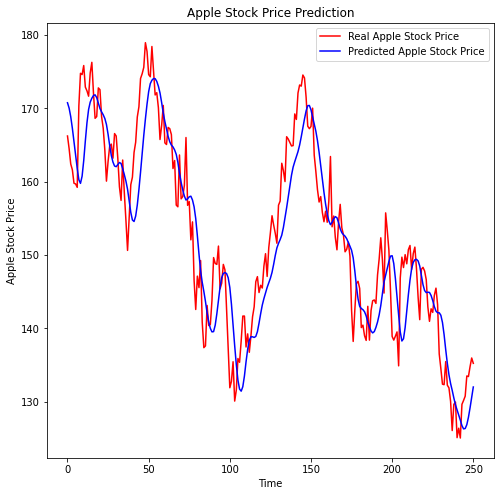

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(y_test,color='Red',label='Real Apple Stock Price')
plt.plot(pred,color='Blue',label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show